In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.impute import SimpleImputer

In [290]:
data = pd.read_csv('train.csv')
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [291]:
#Feature engineering and reduction of dimensions from the data- 
#Concat the (year_built) and (year_modification year) into single feature-

year_built = list(data['YearBuilt'])
year_remod = list(data['YearRemodAdd'])

for yb,yr in enumerate(year_built):
    if year_built[yb] != year_remod[yb]:
        y = year_remod[yb] - year_built[yb]
        year_built[yb] += y

#Basement type feature engineering ->

basement_type1_total = list(new_data1['BsmtFinSF1'])
basement_type2 = list(new_data1['BsmtFinSF2'])

for n,tak in enumerate(basement_type1_total):
    basement_type1_total[n] += basement_type2[n]
    

#Floor feature concat ->
first_floor = list(new_data1['1stFlrSF'])
second_floor = list(new_data['2ndFlrSF'])

for n,tak in enumerate(first_floor):
    first_floor[n] += second_floor[n]

#basement features->

basement_full_bath = list(new_data1['BsmtFullBath'])
basement_half_bath = list(new_data1['BsmtHalfBath'])
for n,tak in enumerate(basement_full_bath):
    basement_full_bath[n] += basement_half_bath[n]

In [292]:
# Data cleaning-
#Function used to remove the null value as (other) in place of NULL or NONE values.
#This function takes two parameters first whole(data), second (feature needs to be cleaned)

def remove_null(dat,feature):
    l = list(dat[feature.isnull()].index.tolist())
    features = list(feature)
    for n in l:
        features[n] = 'other'
    return features

#Function to convert the columns into dataframe for concatenation into original_data-
'''In this function first parameter is used for alloting the name to the column
    and second is the real_column which needs to be converted'''

def convert(column_name,real_column):
    take = pd.Series(real_column)
    df = pd.DataFrame({column_name:take})
    return df

#Function to fill the null integer  values by using maximum occurence of number-

def fill_null(change):
    arr = np.array(change).reshape(-1,1)
    model = SimpleImputer(strategy='most_frequent')
    model.fit(arr)
    chan = model.transform(arr)
    
    return chan



In [293]:
#Removing the null values by using functions-
alley = remove_null(data,data['Alley'])
alley = convert('alley',alley)

pool_quality = remove_null(data,data['PoolQC'])
pool_quality = convert('pool_quality',pool_quality)

fence = remove_null(data,data['Fence'])
fence = convert('fence',fence)

misc_feature = remove_null(data,data['MiscFeature'])
misc_feature = convert('misc_feature',misc_feature)

garage_cond = remove_null(data,data['GarageCond'])
garage_cond = convert('garage_cond',garage_cond)

garage_quality = remove_null(data,data['GarageQual'])
garage_quality = convert('garage_quality',garage_quality)

garage_finish = remove_null(data,data['GarageFinish'])
garage_finish = convert('garage_finish',garage_finish)

fireplace_quality = remove_null(data,data['FireplaceQu'])
fireplace_quality = convert('fireplace_quality',fireplace_quality)

basement_finished = remove_null(data,data['BsmtFinType2'])
basement_finished = convert('basement_finished2',basement_finished)

basement_finished1 = remove_null(data,data['BsmtFinType1'])
basement_finished1 = convert('basement_finished1',basement_finished1)

basement_exposure = remove_null(data,data['BsmtExposure'])
basement_exposure = convert('basement_exposure',basement_exposure)

basement_cond = remove_null(data,data['BsmtCond'])
basement_cond = convert('basement_cond',basement_cond)

basement_quality = remove_null(data,data['BsmtQual'])
basement_quality = convert('basement_quality',basement_quality)

garage_type = remove_null(data,data['GarageType'])
garage_type = convert('garage_type',garage_type)

electrical = remove_null(data,data['Electrical'])
electrical = convert('electrical',electrical)

mas_vnr_type = remove_null(data,data['MasVnrType'])
mas_vnr_type = convert('mas_vnr_type',mas_vnr_type)


#In this section we are filling the missing values by using the maximum frequency of the number-

lotfrontage = fill_null(data['LotFrontage'])
lis = list(lotfrontage.reshape(-1,1))
lotfrontage = convert('lotfrontage',lis)

garage_year_built = fill_null(data['GarageYrBlt'])
lis = list(garage_year_built.reshape(-1,1))
garage_year_built = convert('garage_year_built',lis)

mas_vnr_area = fill_null(data['MasVnrArea'])
lis = list(mas_vnr_area.reshape(-1,1))
mas_vnr_area = convert('mas_vnr_area',lis)

year_built = convert('year_built',year_built)
basement_type_total = convert('basement_type',basement_type1_total)
total_floor = convert('total_floor',first_floor)
basement_bath = convert('total_basement_bath',basement_full_bath)

In [294]:
#At this section we are dropping the values after getting clean data from them->

data.drop(['Alley','PoolQC','Fence','MiscFeature','GarageCond','GarageQual','GarageFinish','FireplaceQu','GarageType'],axis=1,inplace=True)
data.drop(['BsmtFinType2','BsmtFinType1','BsmtExposure','BsmtCond','BsmtQual','LotFrontage','GarageYrBlt','Electrical'],axis=1,inplace=True)
data.drop(['MasVnrType','MasVnrArea'],axis=1,inplace=True)
data.dropna(inplace=True)

In [295]:
#At this section we are concatenating the clean data into new dataframe->

new_data = pd.concat([data,alley,pool_quality,fence,misc_feature,garage_cond,garage_quality,garage_finish,
                     fireplace_quality,basement_finished],axis=1)
new_data1 = pd.concat([new_data,basement_finished1,basement_exposure,basement_cond,basement_quality,garage_type,
                     electrical,mas_vnr_type,lotfrontage,garage_year_built,mas_vnr_area],axis=1)

In [296]:
'''This is our clean data now we need to visualise the data on map to check the dependencies of (SalePrice) 
    on the  data'''

new_data1 = pd.concat([new_data1,year_built,basement_type_total,total_floor,basement_bath],axis=1)
new_data1.head()


,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,garage_type,electrical,mas_vnr_type,lotfrontage,garage_year_built,mas_vnr_area,year_built,basement_type,total_floor,total_basement_bath
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,Attchd,SBrkr,BrkFace,[65.0],[2003.0],[196.0],2003,706,1710,1
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,Attchd,SBrkr,None,[80.0],[1976.0],[0.0],1976,978,1262,1
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,Attchd,SBrkr,BrkFace,[68.0],[2001.0],[162.0],2002,486,1786,1
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,Detchd,SBrkr,None,[60.0],[1998.0],[0.0],1970,216,1717,1
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,Attchd,SBrkr,BrkFace,[84.0],[2000.0],[350.0],2000,655,2198,1


In [314]:
new_data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 0 to 1459
Data columns (total 85 columns):
Id                     1460 non-null int64
MSSubClass             1460 non-null int64
MSZoning               1460 non-null object
LotArea                1460 non-null int64
Street                 1460 non-null object
LotShape               1460 non-null object
LandContour            1460 non-null object
Utilities              1460 non-null object
LotConfig              1460 non-null object
LandSlope              1460 non-null object
Neighborhood           1460 non-null object
Condition1             1460 non-null object
Condition2             1460 non-null object
BldgType               1460 non-null object
HouseStyle             1460 non-null object
OverallQual            1460 non-null int64
OverallCond            1460 non-null int64
YearBuilt              1460 non-null int64
YearRemodAdd           1460 non-null int64
RoofStyle              1460 non-null object
RoofMatl            

In [332]:
#Regression testing- 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures

x = new_data1[['LotArea','year_built','garage_year_built','GarageArea','mas_vnr_area',
               'TotalBsmtSF','total_floor','GrLivArea','total_basement_bath','TotRmsAbvGrd',
                  'GarageCars','OpenPorchSF']]

#x = new_data1[['EnclosedPorch']]
y = new_data1['SalePrice']

x = np.array(x).astype('float')


scale = StandardScaler()
scale.fit(x)
x = scale.transform(x)

poly = PolynomialFeatures(degree=2)
x = poly.fit_transform(x)

folds = KFold(n_splits=2)
folds.get_n_splits(x)
for train_index, test_index in folds.split(x):
    x_train,x_test = x[train_index],x[test_index]
    y_train,y_test = y[train_index],y[test_index]


model = LinearRegression()
model.fit(x_train,y_train)
pr = model.predict(x_test)
model.score(x_test,y_test)*100


78.11749386804539

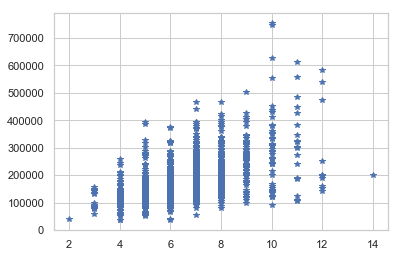

In [306]:
plt.plot(new_data1['TotRmsAbvGrd'],y,'*')

In [339]:
#Ridge
from sklearn.linear_model import Ridge
model_ridge = Ridge(alpha=0.1)
model_ridge.fit(x_train,y_train)
pre  = model_ridge.predict(x_test)
model.score(x_test,y_test)*100

78.11749386804539

In [435]:
#Lasso
from sklearn.linear_model import Lasso
lasso_model = Lasso(tol=0.1)
lasso_model.fit(x_train,y_train)
pre = lasso_model.predict(x_test)
lasso_model.score(x_test,y_test)*100

80.91995839305703

In [436]:
#SVM predicts worst prediction->
from sklearn import svm
svm_model  = svm.SVR(kernel='linear',tol=0.1,C=0.001)
svm_model.fit(x_train,y_train)
pre = svm_model.predict(x_test)
svm_model.score(x_test,y_test)*100

-3.779442923808274

In [437]:
#Decisiontree->
from sklearn import tree
tree_model = tree.DecisionTreeRegressor(criterion='mae',max_depth=50,min_samples_leaf=2)
tree_model.fit(x_train,y_train)
tree_model.score(x_test,y_test)*100

67.50394185666404

In [454]:
from sklearn.ensemble import RandomForestRegressor
random_model = RandomForestRegressor(n_estimators=10,criterion='mae',min_samples_split=3,max_depth=10,
                                    max_leaf_nodes=40)
random_model.fit(x_train,y_train)
random_model.score(x_test,y_test)*100


78.94556451562626

In [439]:
random_model

RandomForestRegressor(bootstrap=True, criterion='mae', max_depth=30,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=3,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

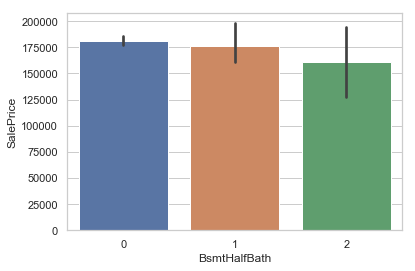

In [433]:
sns.set(style='whitegrid')
sns.barplot(x='BsmtHalfBath',y='SalePrice',data=new_data1)

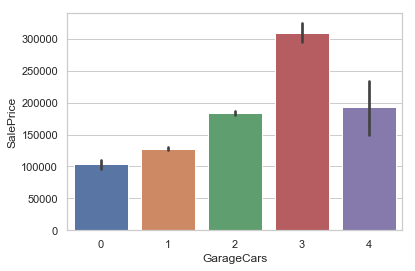

In [434]:
sns.set(style='whitegrid')
sns.barplot(x='GarageCars',y='SalePrice',data=new_data1)